# From neural tuning functions to manifold

author: laquitainesteeve@gmail.com

purpose: Understand the link between neuron tuning functions and neural population manifold.

# Setup

In [136]:
# @title Install libraries
!pip install scipy

In [101]:
# @title Import libraries

# LIBRARIES
from scipy.stats import vonmises
import numpy as np
from matplotlib import pyplot as plt

# PLOT PARAMETERS
FIGSIZE = (5,5)

In [263]:
# @title Define custom functions

def plot_tuning_and_manifold(parameters:dict):
  """Plot tuning functions for two neurons and their neural
  population response manifold
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1
  n1_tuning = vonmises.pdf(parameters["n1_pref_orientation"] * np.pi / 180, parameters["n1_strength"], orientations * np.pi / 180)
  # neuron 2
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)


  # Plot
  fig, axes = plt.subplots(2,1, figsize=FIGSIZE)

  # neuron 1
  axes[0].plot(orientations, n1_tuning, color=(.7,.7,.7));

  # neuron 2
  axes[0].plot(orientations, n2_tuning, color="black");

  # legend
  axes[0].set_title("Tuning functions")  # square axis
  axes[0].set_box_aspect(1)  # square axis
  axes[0].set_xlabel("Orientations");
  axes[0].set_ylabel("Firing rate");
  axes[0].spines[["top","right"]].set_visible(False)



  # MANIFOLD ------------

  # Plot
  axes[1].plot(n1_tuning, n2_tuning, linestyle=":");

  # legend
  axes[1].set_title("Neural manifold")  # square axis
  axes[1].set_box_aspect(1)  # square axis
  axes[1].set_xlabel("Neuron 1");
  axes[1].set_ylabel("Neuron 2");
  axes[1].spines[["top","right"]].set_visible(False)

  plt.tight_layout()


def plot_tuning_and_not_manifold(parameters:dict):
  """Plot tuning functions for two neurons. One neuron has bimodal tuning.
  Plot their neural population response manifold.
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1 (mixture of two von mises)
  comp1 = vonmises.pdf(parameters["n1_pref_orientation_1"] * np.pi / 180, parameters["n1_strength_1"], orientations * np.pi / 180)
  comp2 = vonmises.pdf(parameters["n1_pref_orientation_2"] * np.pi / 180, parameters["n1_strength_2"], orientations * np.pi / 180)
  n1_tuning = parameters["mixture"]*comp1 + (1-parameters["mixture"])*comp2

  # neuron 2
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)


  # Plot
  fig, axes = plt.subplots(2,1, figsize=FIGSIZE)

  # neuron 1
  axes[0].plot(orientations, n1_tuning, color=(.7,.7,.7));

  # neuron 2
  axes[0].plot(orientations, n2_tuning, color="black");

  # legend
  axes[0].set_title("Tuning functions")  # square axis
  axes[0].set_box_aspect(1)  # square axis
  axes[0].set_xlabel("Orientations");
  axes[0].set_ylabel("Firing rate");
  axes[0].spines[["top","right"]].set_visible(False)



  # MANIFOLD ------------

  # Plot
  axes[1].plot(n1_tuning, n2_tuning, linestyle=":");

  # legend
  axes[1].set_title("Not a neural manifold")  # square axis
  axes[1].set_box_aspect(1)  # square axis
  axes[1].set_xlabel("Neuron 1");
  axes[1].set_ylabel("Neuron 2");
  axes[1].spines[["top","right"]].set_visible(False)

  plt.tight_layout()


def plot_tuning_and_disentangled_hypersurface(parameters:dict):
  """Plot tuning functions for two neurons. One neuron has bimodal tuning.
  Plot their neural population response manifold.
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1 (mixture of two von mises)
  comp1 = vonmises.pdf(parameters["n1_pref_orientation_1"] * np.pi / 180, parameters["n1_strength_1"], orientations * np.pi / 180)
  comp2 = vonmises.pdf(parameters["n1_pref_orientation_2"] * np.pi / 180, parameters["n1_strength_2"], orientations * np.pi / 180)
  n1_tuning = parameters["mixture"]*comp1 + (1-parameters["mixture"])*comp2

  # neuron 2
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)

  # neuron 3
  n3_tuning = vonmises.pdf(parameters["n3_pref_orientation"] * np.pi / 180, parameters["n3_strength"], orientations * np.pi / 180)


  # Plot
  fig = plt.figure(figsize=FIGSIZE)
  ax = fig.add_subplot(2, 1, 1)

  # neuron 1
  ax.plot(orientations, n1_tuning, color=(.7,.7,.7));

  # neuron 2
  ax.plot(orientations, n2_tuning, color="black");

  # neuron 3
  ax.plot(orientations, n3_tuning, color=(1,0,0));

  # legend
  ax.set_title("Tuning functions")  # square axis
  ax.set_box_aspect(1)  # square axis
  ax.set_xlabel("Orientations");
  ax.set_ylabel("Firing rate");
  ax.spines[["top","right"]].set_visible(False)



  # MANIFOLD ------------

  # Plot
  ax = fig.add_subplot(2, 1, 2, projection='3d')
  ax.view_init(20, 45, 0) # elev, azim, roll
  ax.plot(n1_tuning, n2_tuning, n3_tuning, linestyle=":");

  # legend
  ax.set_title("Not a neural manifold")  # square axis
  ax.set_xlabel("Neuron 1");
  ax.set_ylabel("Neuron 2");
  ax.set_zlabel("Neuron 3");
  ax.spines[["top","right"]].set_visible(False)
  ax.xaxis.pane.fill = False
  ax.yaxis.pane.fill = False
  ax.zaxis.pane.fill = False
  ax.set_box_aspect((1,1,1))
  plt.tight_layout()


def plot_3_neurons_tunings_and_manifold(parameters:dict):
  """Plot tuning functions for two neurons. One neuron has bimodal tuning.
  Plot their neural population response manifold.
  """

  # TUNING FUNCTIONS ------------

  # Simulate orientation features (degrees)
  orientations = np.linspace(-180, 180, 181)  # 181 values from -180 to 180 degrees


  # Simulate tuning functions
  # neuron 1
  n1_tuning = vonmises.pdf(parameters["n1_pref_orientation"] * np.pi / 180, parameters["n1_strength"], orientations * np.pi / 180)

  # neuron 2
  n2_tuning = vonmises.pdf(parameters["n2_pref_orientation"] * np.pi / 180, parameters["n2_strength"], orientations * np.pi / 180)

  # neuron 3
  n3_tuning = vonmises.pdf(parameters["n3_pref_orientation"] * np.pi / 180, parameters["n3_strength"], orientations * np.pi / 180)


  # Plot
  fig = plt.figure(figsize=FIGSIZE)
  ax = fig.add_subplot(2, 1, 1)

  # neuron 1
  ax.plot(orientations, n1_tuning, color=(.7,.7,.7));

  # neuron 2
  ax.plot(orientations, n2_tuning, color="black");

  # neuron 3
  ax.plot(orientations, n3_tuning, color=(1,0,0));

  # legend
  ax.set_title("Tuning functions")  # square axis
  ax.set_box_aspect(1)  # square axis
  ax.set_xlabel("Orientations");
  ax.set_ylabel("Firing rate");
  ax.spines[["top","right"]].set_visible(False)



  # MANIFOLD ------------

  # Plot
  ax = fig.add_subplot(2, 1, 2, projection='3d')
  ax.view_init(20, 45, 0) # elev, azim, roll
  ax.plot(n1_tuning, n2_tuning, n3_tuning, linestyle=":");

  # legend
  ax.set_title("Not a neural manifold")  # square axis
  ax.set_xlabel("Neuron 1");
  ax.set_ylabel("Neuron 2");
  ax.set_zlabel("Neuron 3");
  ax.spines[["top","right"]].set_visible(False)
  ax.xaxis.pane.fill = False
  ax.yaxis.pane.fill = False
  ax.zaxis.pane.fill = False
  ax.set_box_aspect((1,1,1))
  plt.tight_layout()




# 1 - Tuning phases and manifold

## Case 1: the 90 deg offset

*  Phase of the tuning curves are **offset by 90 degrees**.

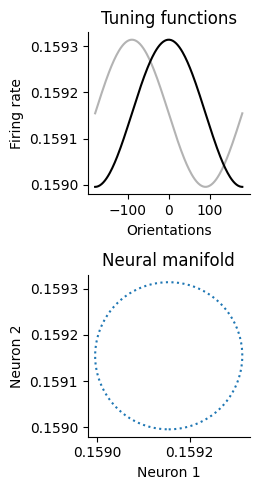

In [149]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": -90,  # mean of the tuning function (concentration)
    "n1_strength": 0.001,        # width of the tuning function (concentration)

    # neuron 2
    "n2_pref_orientation": 0,
    "n2_strength": 0.001

}

plot_tuning_and_manifold(parameters)

## Case 2. Increasing the offset

[TODO]: Increase the phase offset from 135 degrees to 170 degrees, plot the tuning functions and the neural manifold.

[QUESTION]: What happens to the neural manifold?

[ANSWER]: When we increase the offset, the neural manifold gradually morphs into an ellipse with increasing aspect ratio.


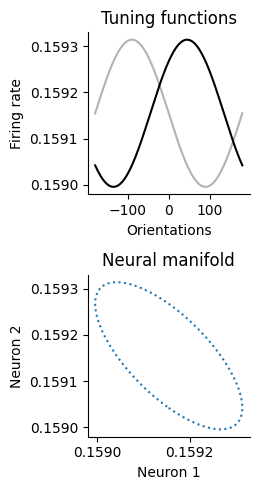

In [150]:
# test an offset of 135 degrees

# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": -90,  # mean of the tuning function (concentration)
    "n1_strength": 0.001,        # width of the tuning function (concentration)

    # neuron 2
    "n2_pref_orientation": 45,
    "n2_strength": 0.001

}

plot_tuning_and_manifold(parameters)

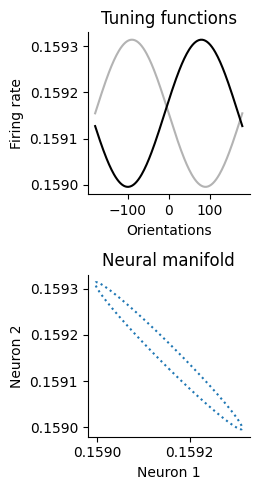

In [151]:
# test an offset of 170 degrees

# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": -90,  # mean of the tuning function (concentration)
    "n1_strength": 0.001,        # width of the tuning function (concentration)

    # neuron 2
    "n2_pref_orientation": 80,
    "n2_strength": 0.001

}

plot_tuning_and_manifold(parameters)

# 2 - Tuning shapes and manifold

[TODO]: Increase the tuning strength (concentration parameters) of the tuning functions. Try the same strength for both neurons first.

[QUESTION]: How does the neural manifold change?

[ANSWER]: The neural manifold now takes a crescent-like shape.

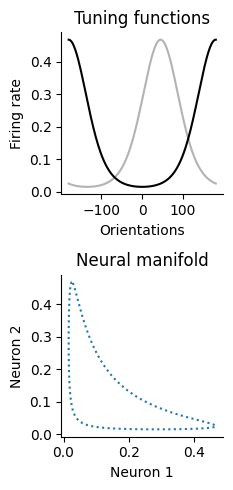

In [159]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation": 45,
    "n1_strength": 1.7,

    # neuron 2
    "n2_pref_orientation": -180,
    "n2_strength": 1.7

}

plot_tuning_and_manifold(parameters)

# 3 - When not a manifold

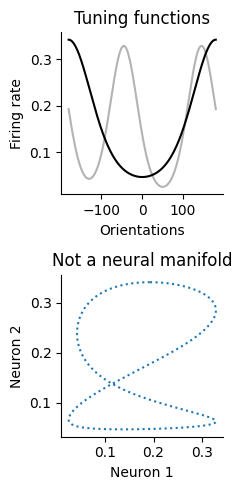

In [196]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation_1": -45,
    "n1_strength_1": 3,
    "n1_pref_orientation_2": 145,
    "n1_strength_2": 3,
    "mixture": 0.5,

    # neuron 2
    "n2_pref_orientation": -180,
    "n2_strength": 1

}

plot_tuning_and_not_manifold(parameters)

# 4 - Disentangling the hypersurface

[TODO]: add a third neuron to the population. Explore its parameters.

[QUESTION]: Can you find a set of parameters that produces a continuous hyperplane (a neural manifold) in the three-neuron space?

[ANSWER]: Yes we recover a continuous hyperplane (a manifold) by adding to the set of parameters:
- "n3_pref_orientation": 150,
- "n3_strength": 0.9

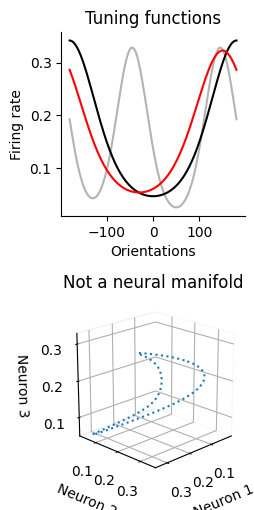

In [282]:
# neuron 1
parameters = {

    # neuron 1
    "n1_pref_orientation_1": -45,
    "n1_strength_1": 3,
    "n1_pref_orientation_2": 145,
    "n1_strength_2": 3,
    "mixture": 0.5,

    # neuron 2
    "n2_pref_orientation": -180,
    "n2_strength": 1,

    # neuron 3
    "n3_pref_orientation": 150,
    "n3_strength": 0.9

}

plot_tuning_and_disentangled_hypersurface(parameters)

# 5 - Tuning strength and manifold

## Case 1: weak tunings


[TODO]: Start with simulating this weak tuning

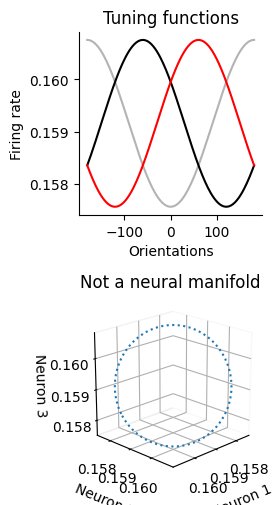

In [288]:

# set parameters
parameters = {

    # neuron 1
    "n1_pref_orientation": -180,
    "n1_strength": 0.01,

    # neuron 2
    "n2_pref_orientation": -60,
    "n2_strength": 0.01,

    # neuron 3
    "n3_pref_orientation": 60,
    "n3_strength": 0.01

}

# simulate
plot_3_neurons_tunings_and_manifold(parameters)

## Case 2: Strong tunings

[TODO]: Simulate much stronger tunings (the same for all neurons first).

[QUESTION]: How does the neural manifold change?


[ANSWER]: Narrower tuning curves lead to manifold that is highly curved

[IMPLICATIONS]: The neurons' tuning strengths condition the number of high-dimensional linear subspaces that are needed to explain most of the variance of the neural response manifold (See next notebook).

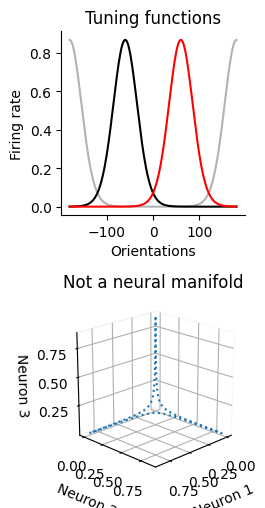

In [286]:
# set parameters
parameters = {

    # neuron 1
    "n1_pref_orientation": -180,
    "n1_strength": 5,

    # neuron 2
    "n2_pref_orientation": -60,
    "n2_strength": 5,

    # neuron 3
    "n3_pref_orientation": 60,
    "n3_strength": 5

}

# simulate
plot_3_neurons_tunings_and_manifold(parameters)

# Readings

Kriegeskorte and Wei, “Neural Tuning and Representational Geometry.”